In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
15,1175,2,42.0
8,1310,3,50.0
9,3700,5,167.0
1,2600,4,120.0
10,1800,3,82.0


In [4]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

Scaled_X = sx.fit_transform(df.drop('price', axis='columns'))

C:\Users\biya\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
Scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [6]:
w = np.ones(shape=2)

In [7]:
Scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [8]:
np.dot(w, Scaled_X.T)
#w.dot(Scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [40]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w=np.ones(shape = number_of_features)
    b=0
    total_samples = X.shape[0]
    
    epoch_list = []
    cost_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w,X.T)+b
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        Cost = np.mean(np.square(y_true - y_predicted))
        
        if i%10 == 0:
            epoch_list.append(i)
            cost_list.append(Cost)
            
    return w, b, Cost, cost_list, epoch_list
            
w, b, cost, cost_list, epoch_list = batch_gradient_descent(Scaled_X, Scaled_y.reshape(Scaled_y.shape[0],), 500 )
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

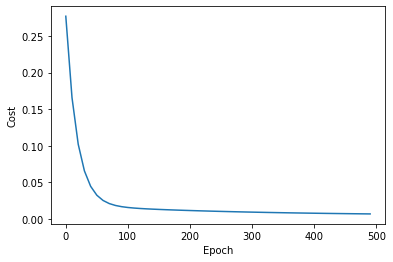

In [41]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list,cost_list)

In [45]:
sx.transform([[2400,4]])[0]

array([0.55172414, 0.75      ])

In [53]:
def predict(area, bedroom, w, b):
    Scaled_X = sx.transform([[area, bedroom]])[0]
    
    scaled_price = w[0]*Scaled_X[0]+w[1]*Scaled_X[1]+b
    return sy.inverse_transform([[scaled_price]])[0][0]

In [54]:
predict(2600, 4, w, b)

128.45484403267596

In [55]:
predict(1000, 2, w, b)

30.253094462442363

In [56]:
predict(2250, 3, w, b)

94.16701133317747

In [1]:
import random
random.randint(0,6)

3

# Stochastic Gradient descent

In [64]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w=np.ones(shape = number_of_features)
    b=0
    total_samples = X.shape[0]
    
    epoch_list = []
    cost_list = []
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w,sample_x.T)+b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        Cost = np.mean(np.square(sample_y - y_predicted))
        
        if i%100 == 0:
            epoch_list.append(i)
            cost_list.append(Cost)
            
    return w, b, Cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(Scaled_X, Scaled_y.reshape(Scaled_y.shape[0],), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.71103455, 0.67540004]), -0.22931673341515896, 0.004468044454810419)

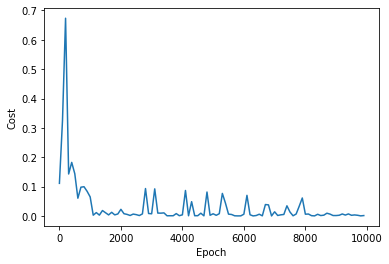

In [65]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [66]:
predict(2600, 4, w_sgd, b_sgd)

129.00628709294162

In [67]:
predict(2250, 3, w_sgd, b_sgd)

94.62657613448032

# Mini batch gradient descent

In [9]:
np.random.permutation(25)

array([22,  7,  9,  1, 10,  3, 19, 18,  0, 13, 23, 15, 21, 14,  6, 24,  5,
       16, 11,  4, 17, 12, 20,  2,  8])

In [14]:
def mini_batch_gradient_descent(X, y_true, epochs=100, batch_size = 5, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w=np.ones(shape = number_of_features)
    b=0
    total_samples = X.shape[0]
    
    if batch_size >= total_samples:
        btach_size = total_samples
    
    epoch_list = []
    cost_list = []
    
    number_of_batches = int(total_samples/batch_size)
    
    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        
        for j in range(0, total_samples, batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w,Xj.T)+b

            w_grad = -(2/total_samples)*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/total_samples)*np.sum(yj-y_predicted)

            w = w - learning_rate*w_grad
            b = b - learning_rate*b_grad

            Cost = np.mean(np.square(yj - y_predicted))
        
        if i%10 == 0:
            epoch_list.append(i)
            cost_list.append(Cost)
            
    return w, b, Cost, cost_list, epoch_list
            
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(Scaled_X, Scaled_y.reshape(Scaled_y.shape[0],), 300, 5 )
w,b,cost

(array([0.74751285, 0.7180205 ]), -0.26862826145575036, 0.006158940510449115)